In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

In [4]:
x = np.arange(1, 360)
y = np.sin(x/180*np.pi)*4

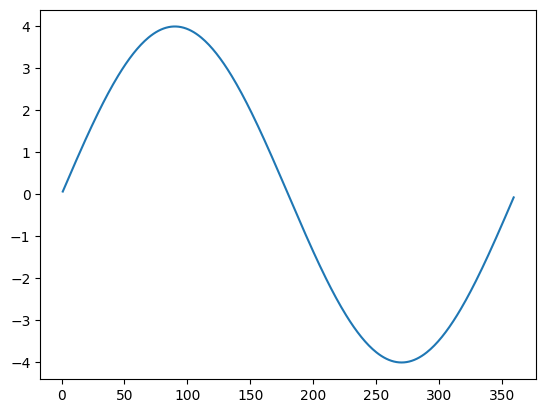

In [5]:
plt.plot(x, y)

In [23]:
minmax = MinMaxScaler((-1, 1))
standard = StandardScaler()
robust_1_75 = RobustScaler(quantile_range=(1.0, 75.0))
robust_1_50 = RobustScaler(quantile_range=(1.0, 50.0))
robust_20_50 = RobustScaler(quantile_range=(20.0, 50.0))
robust_25_75 = RobustScaler(quantile_range=(25.0, 75.0))
robust_0_100 = RobustScaler(quantile_range=(0.0, 100.0))

quant = QuantileTransformer(n_quantiles=100)

y_minmax = minmax.fit_transform(y.reshape(-1, 1))
y_standard = standard.fit_transform(y.reshape(-1, 1))
y_quant = quant.fit_transform(y.reshape(-1, 1))

y_robust_1_75  = robust_1_75.fit_transform(y.reshape(-1, 1))
y_robust_1_50  = robust_1_50.fit_transform(y.reshape(-1, 1))
y_robust_20_50 = robust_20_50.fit_transform(y.reshape(-1, 1))
y_robust_25_75 = robust_25_75.fit_transform(y.reshape(-1, 1))
y_robust_0_100 = robust_0_100.fit_transform(y.reshape(-1, 1))


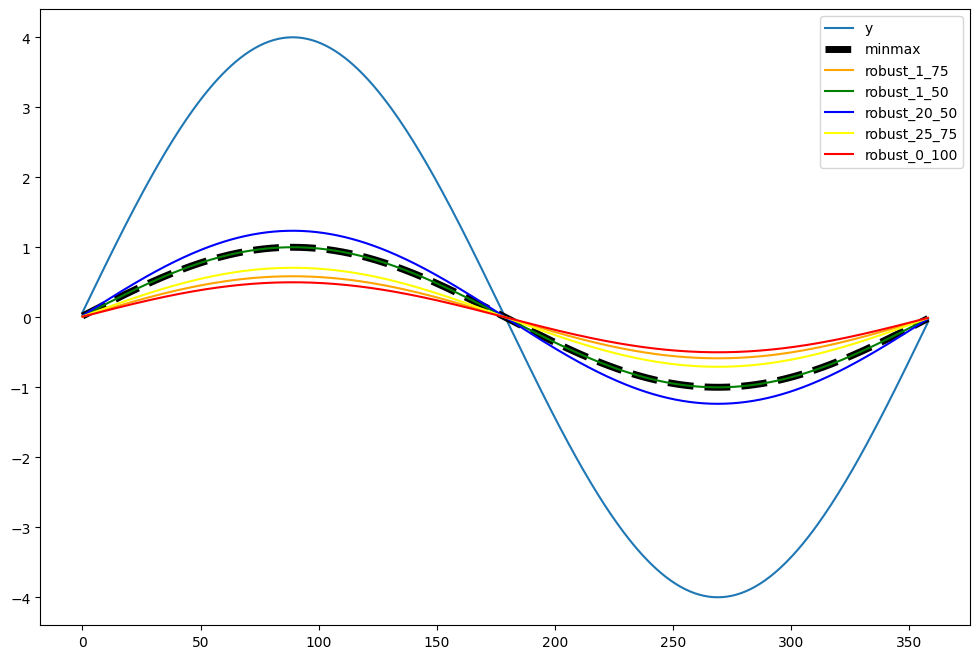

In [29]:
plt.figure(figsize=(12, 8))
plt.plot(y, label='y')
plt.plot(y_minmax, label='minmax', ls='--', lw=5.0, color='black')
plt.plot(y_robust_1_75, label='robust_1_75', color='orange')
plt.plot(y_robust_1_50, label='robust_1_50', color='green')
plt.plot(y_robust_20_50, label='robust_20_50', color='blue')
plt.plot(y_robust_25_75, label='robust_25_75', color='yellow')
plt.plot(y_robust_0_100, label='robust_0_100', color='red')
plt.legend()
plt.show()

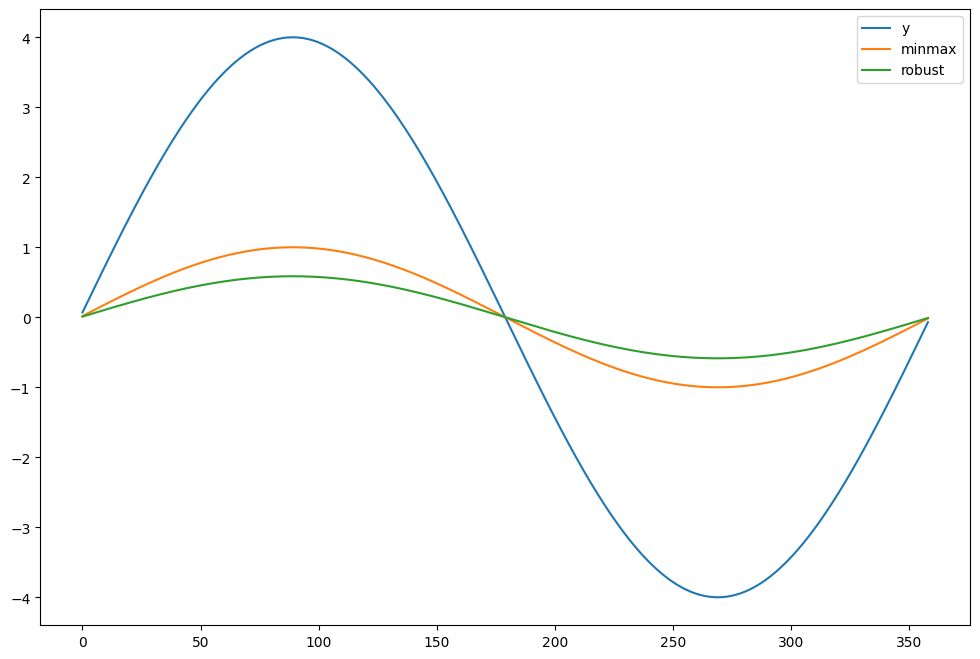

In [22]:
plt.figure(figsize=(12, 8))
plt.plot(y, label='y')
plt.plot(y_minmax, label='minmax')
# plt.plot(y_standard, label='standard')
plt.plot(y_robust, label='robust')
# plt.plot(y_quant, label='quatn')
plt.legend()
plt.show()

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import ipywidgets as widgets
from ipywidgets import interact

# Például valamilyen y:
np.random.seed(0)
y = np.random.randn(100) * 3 + 3  # Dummy adatok

minmax = MinMaxScaler((-1, 1))
y_minmax = minmax.fit_transform(y.reshape(-1, 1))

# Interaktív plot függvény
def plot_robust_scaling(lower=25.0, upper=75.0):
    scaler = RobustScaler(quantile_range=(lower, upper))
    y_robust = scaler.fit_transform(y.reshape(-1, 1))

    plt.figure(figsize=(12, 6))
    plt.plot(y, label='Original y', lw=2)
    plt.plot(y_minmax, label='MinMax [-1, 1]', ls='--', color='black')
    plt.plot(y_robust, label=f'RobustScaler ({lower}, {upper})', color='red')
    plt.legend()
    plt.title("RobustScaler hatása különböző quantile_range értékeknél")
    plt.grid(True)
    plt.show()

# Csúszkák definiálása
interact(
    plot_robust_scaling,
    lower=widgets.FloatSlider(value=25.0, min=0.0, max=50.0, step=1.0, description='Lower %'),
    upper=widgets.FloatSlider(value=75.0, min=50.0, max=100.0, step=1.0, description='Upper %')
)


interactive(children=(FloatSlider(value=25.0, description='Lower %', max=50.0, step=1.0), FloatSlider(value=75…

<function __main__.plot_robust_scaling(lower=25.0, upper=75.0)>